# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

We will be working on a data set of 426K records that have been given to us in csv format that contains information about cars with different characteristics used in different states and regions of the country, we are going to perform data engineering and feature engineering to transform the data in a way that facilitates its processing for our model and to know which are the main components that most influence the price of a vehicle and to be able to give these recommendations to our client.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from scipy import stats 
from category_encoders import TargetEncoder


In [341]:
data = pd.read_csv("data/vehicles.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

we have a total of 426880 entries

In [342]:
data.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

I can see a lot of null values in the head, so I start reviewing nulls

In [343]:
def calculate_null_percentage(data): 
    null_info = {
        'col_nulls': data.columns,
        '% nulls': round((data.isnull().sum() / len(data)) * 100, 2)
    }
    return pd.DataFrame(null_info).drop(columns=["col_nulls"])

print("")
calculate_null_percentage(data)

% nulls
id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00

We can see a lot of null values in the data, I will be working in those values in the `Data Preparation` step. I am going to start checking field by field looking for values that needs some transformation or Nominal and Ordinal Values.

1900.0 - 2022.0


Text(0.5, 1.0, 'Information About the Car Years')

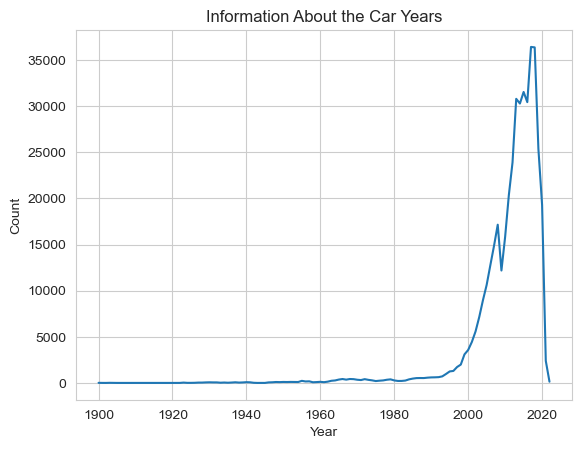

In [344]:
# Exploring year field
print(str(data["year"].min()) + " - " + str(data["year"].max()))
plt.plot(data["year"].value_counts().sort_index(ascending=True))
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Information About the Car Years")

We have data from 1900 to 2022

In [345]:
print("Total Manufactures:" + str(len(data["manufacturer"].unique())))
print(data["manufacturer"].value_counts())

Total Manufactures:43
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun         

In [346]:
# Exploring price field
print(str(data["price"].min()) + " - " + str(data["price"].max()))

0 - 3736928711


In [347]:
#This is a Ordinal Feature
data["condition"].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [348]:
#This is a Nominal Feature
data["fuel"].value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [349]:
#This is a Nominal Feature
data["title_status"].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [350]:
#This is a Nominal Feature
data["transmission"].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [351]:
data["drive"].value_counts()
# Nominal Feature
# 4wd means 4x4
# fwd front wheel drive 
# rwd rear wheel drive

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

Text(0, 0.5, 'Count')

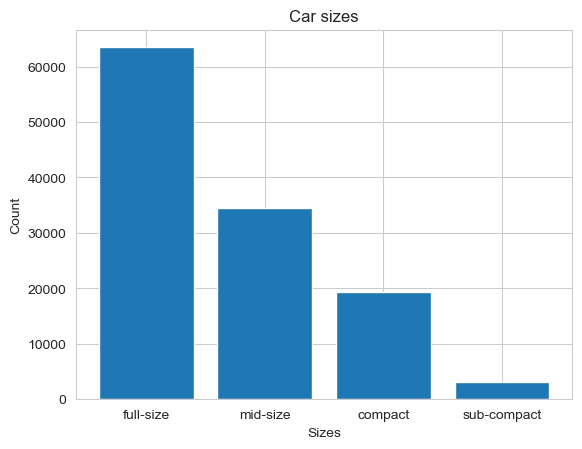

In [352]:
size_count = data["size"].value_counts()

# Ordinal Feature
plt.bar(size_count.index, size_count.values)
plt.title("Car sizes")
plt.xlabel("Sizes")
plt.ylabel("Count")


In [353]:
data["type"].value_counts()
# Nominal Feature

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [354]:
data["paint_color"].value_counts()
# Nominal Feature

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

In [355]:
print(data["state"].value_counts())
print(len(data["state"].unique()))
# Nominal Feature

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64
51


In this process we were able to identify nominal and ordinal features.

In [356]:
nominal_f_columns = ["state", "paint_color", "title_status", "type", "manufacturer", "model", "fuel", "transmission", "drive"]
ordinal_f_columns = ["condition", "size"]


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [357]:
data.set_index(["id"])

region  price    year manufacturer  \
id                                                               
7222695916                prescott   6000     NaN          NaN   
7218891961            fayetteville  11900     NaN          NaN   
7221797935            florida keys  21000     NaN          NaN   
7222270760  worcester / central MA   1500     NaN          NaN   
7210384030              greensboro   4900     NaN          NaN   
...                            ...    ...     ...          ...   
7301591192                 wyoming  23590  2019.0       nissan   
7301591187                 wyoming  30590  2020.0        volvo   
7301591147                 wyoming  34990  2020.0     cadillac   
7301591140                 wyoming  28990  2018.0        lexus   
7301591129                 wyoming  30590  2019.0          bmw   

                               model condition    cylinders    fuel  odometer  \
id                                                                              
7222695916                       NaN       NaN          NaN     NaN       NaN   
7218891961                       NaN       NaN          NaN     NaN       NaN   
7221797935                       NaN       NaN          NaN     NaN       NaN   
7222270760                       NaN       NaN          NaN     NaN       NaN   
7210384030                       NaN       NaN          NaN     NaN       NaN   
...                              ...       ...          ...     ...       ...   
7301591192         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
7301591187  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
7301591147          xt4 sport suv 4d      good          NaN  diesel    4174.0   
7301591140           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
7301591129  4 series 430i gran coupe      good          NaN     gas   22716.0   

           title_status transmission                VIN drive size       type  \
id                                                                              
7222695916          NaN          NaN                NaN   NaN  NaN        NaN   
7218891961          NaN          NaN                NaN   NaN  NaN        NaN   
7221797935          NaN          NaN                NaN   NaN  NaN        NaN   
7222270760          NaN          NaN                NaN   NaN  NaN        NaN   
7210384030          NaN          NaN                NaN   NaN  NaN        NaN   
...                 ...          ...                ...   ...  ...        ...   
7301591192        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
7301591187        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
7301591147        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
7301591140        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
7301591129        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

           paint_color state  
id                            
7222695916         NaN    az  
7218891961         NaN    ar  
7221797935         NaN    fl  
7222270760         NaN    ma  
7210384030         NaN    nc  
...                ...   ...  
7301591192         NaN    wy  
7301591187         red    wy  
7301591147       white    wy  
7301591140      silver    wy  
7301591129         NaN    wy  

[426880 rows x 17 columns]

##### Null Values
I decided to drop de rows with null values for columns that have less than 5% of info with nulls

In [358]:
data.dropna(subset=['year', 'model', 'fuel', 'odometer', 'title_status', 'transmission'], inplace = True) 
calculate_null_percentage(data)


% nulls
id               0.00
region           0.00
price            0.00
year             0.00
manufacturer     3.94
model            0.00
condition       40.07
cylinders       41.68
fuel             0.00
odometer         0.00
title_status     0.00
transmission     0.00
VIN             38.38
drive           30.07
size            71.03
type            21.88
paint_color     29.15
state            0.00

We can fill in the rest of the Values with the Mode

In [359]:
data = data.fillna(data.mode().iloc[0])
calculate_null_percentage(data)

% nulls
id                0.0
region            0.0
price             0.0
year              0.0
manufacturer      0.0
model             0.0
condition         0.0
cylinders         0.0
fuel              0.0
odometer          0.0
title_status      0.0
transmission      0.0
VIN               0.0
drive             0.0
size              0.0
type              0.0
paint_color       0.0
state             0.0

I got rid of the null values, now I am going to remove the unnecesarry columns

In [360]:
data.drop(["VIN","region"], axis=1, inplace=True)

#### Format Data
The Cylinders column can be converted to numeric

In [361]:
data["cylinders"].replace({"8 cylinders" : 8, "6 cylinders" : 6, "0    6 cylinders" : 6, \
                         "5 cylinders" : 5, "4 cylinders" : 4, "10 cylinders" : 10, \
                         "3 cylinders" : 3, "12 cylinders" : 12, "other" : 6}, inplace = True)

#### Categorical Features
Now let's work in the categorical Features ordinal and nominal.

In [362]:
# Transformer Nominal Features
target_transformer = TargetEncoder()

enc_df = target_transformer.fit_transform(data[nominal_f_columns], data["price"])

# combine and create a new df
# Remove the original categorical features
vehicle_df = data.drop(nominal_f_columns, axis=1)

enc_df.index = vehicle_df.index
df = pd.concat([vehicle_df, enc_df], axis = 1).set_index("id")
df

price    year  condition  cylinders  odometer       size  \
id                                                                     
7316814884  33590  2014.0       good          8   57923.0  full-size   
7316814758  22590  2010.0       good          8   71229.0  full-size   
7316814989  39590  2020.0       good          8   19160.0  full-size   
7316743432  30990  2017.0       good          8   41124.0  full-size   
7316356412  15000  2013.0  excellent          6  128000.0  full-size   
...           ...     ...        ...        ...       ...        ...   
7301591192  23590  2019.0       good          6   32226.0  full-size   
7301591187  30590  2020.0       good          6   12029.0  full-size   
7301591147  34990  2020.0       good          6    4174.0  full-size   
7301591140  28990  2018.0       good          6   30112.0  full-size   
7301591129  30590  2019.0       good          6   22716.0  full-size   

                   state    paint_color  title_status           type  \
id                                                                     
7316814884  41394.556648   65153.527177  64397.670565  151222.538514   
7316814758  41394.556648   16457.066559  64397.670565  151222.538514   
7316814989  41394.556648   22651.519024  64397.670565  151222.538514   
7316743432  41394.556648   22651.519024  64397.670565  151222.538514   
7316356412  41394.556648   42978.849989  64397.670565   27840.187065   
...                  ...            ...           ...            ...   
7301591192  21098.611765   65153.527177  64397.670565   81901.708563   
7301591187  21098.611765   22651.519024  64397.670565   81901.708563   
7301591147  21098.611765   65153.527177  64397.670565   14569.429923   
7301591140  21098.611765  105240.243671  64397.670565   81901.708563   
7301591129  21098.611765   65153.527177  64397.670565   21962.882134   

             manufacturer         model           fuel  transmission  \
id                                                                     
7316814884   31131.872718  35224.934521   58202.046122  30052.870253   
7316814758   23950.644746  20613.607085   58202.046122  30052.870253   
7316814989   23950.644746  34391.419552   58202.046122  30052.870253   
7316743432  245666.299855  34749.481707   58202.046122  30052.870253   
7316356412   36741.604981  18860.384778   58202.046122  64410.218825   
...                   ...           ...            ...           ...   
7301591192   19314.095053  41441.210324   58202.046122  30052.870253   
7301591187  401447.297113  30767.270620   58202.046122  30052.870253   
7301591147   20075.963997  34566.344086  122837.606366  30052.870253   
7301591140   19389.550019  24225.749781   58202.046122  30052.870253   
7301591129   19137.162331  37295.201810   58202.046122  30052.870253   

                   drive  
id                        
7316814884  87133.267810  
7316814758  87133.267810  
7316814989  87133.267810  
7316743432  87133.267810  
7316356412  41592.945699  
...                  ...  
7301591192  15247.331671  
7301591187  15247.331671  
7301591147  87133.267810  
7301591140  15247.331671  
7301591129  41592.945699  

[405594 rows x 15 columns]

In [363]:
#Transformer Ordinal Features
ordinal_transformer = OrdinalEncoder()

oe_condition = OrdinalEncoder(categories = [['salvage', 'new', 'fair', 'like new', 'excellent', 'good']])
oe_size = OrdinalEncoder(categories = [['sub-compact', 'compact', 'mid-size', 'full-size']])
ordinal_ohe_transformer = make_column_transformer((oe_condition, ['condition']),
                                                  (oe_size, ['size']),
                                          remainder='passthrough')

ordinal_processeced = ordinal_ohe_transformer.fit_transform(df[ordinal_f_columns])
ordinal_processeced

array([[5., 3.],
       [5., 3.],
       [5., 3.],
       ...,
       [5., 3.],
       [5., 3.],
       [5., 3.]])

In [364]:
df_processed = pd.DataFrame(ordinal_processeced, columns=ordinal_f_columns, index=df.index)
df_processed

condition  size
id                         
7316814884        5.0   3.0
7316814758        5.0   3.0
7316814989        5.0   3.0
7316743432        5.0   3.0
7316356412        4.0   3.0
...               ...   ...
7301591192        5.0   3.0
7301591187        5.0   3.0
7301591147        5.0   3.0
7301591140        5.0   3.0
7301591129        5.0   3.0

[405594 rows x 2 columns]

In [365]:
df_cleaned = pd.concat([df.drop(columns=['condition', 'size']), df_processed], axis=1)
df_cleaned

price    year  cylinders  odometer         state    paint_color  \
id                                                                            
7316814884  33590  2014.0          8   57923.0  41394.556648   65153.527177   
7316814758  22590  2010.0          8   71229.0  41394.556648   16457.066559   
7316814989  39590  2020.0          8   19160.0  41394.556648   22651.519024   
7316743432  30990  2017.0          8   41124.0  41394.556648   22651.519024   
7316356412  15000  2013.0          6  128000.0  41394.556648   42978.849989   
...           ...     ...        ...       ...           ...            ...   
7301591192  23590  2019.0          6   32226.0  21098.611765   65153.527177   
7301591187  30590  2020.0          6   12029.0  21098.611765   22651.519024   
7301591147  34990  2020.0          6    4174.0  21098.611765   65153.527177   
7301591140  28990  2018.0          6   30112.0  21098.611765  105240.243671   
7301591129  30590  2019.0          6   22716.0  21098.611765   65153.527177   

            title_status           type   manufacturer         model  \
id                                                                     
7316814884  64397.670565  151222.538514   31131.872718  35224.934521   
7316814758  64397.670565  151222.538514   23950.644746  20613.607085   
7316814989  64397.670565  151222.538514   23950.644746  34391.419552   
7316743432  64397.670565  151222.538514  245666.299855  34749.481707   
7316356412  64397.670565   27840.187065   36741.604981  18860.384778   
...                  ...            ...            ...           ...   
7301591192  64397.670565   81901.708563   19314.095053  41441.210324   
7301591187  64397.670565   81901.708563  401447.297113  30767.270620   
7301591147  64397.670565   14569.429923   20075.963997  34566.344086   
7301591140  64397.670565   81901.708563   19389.550019  24225.749781   
7301591129  64397.670565   21962.882134   19137.162331  37295.201810   

                     fuel  transmission         drive  condition  size  
id                                                                      
7316814884   58202.046122  30052.870253  87133.267810        5.0   3.0  
7316814758   58202.046122  30052.870253  87133.267810        5.0   3.0  
7316814989   58202.046122  30052.870253  87133.267810        5.0   3.0  
7316743432   58202.046122  30052.870253  87133.267810        5.0   3.0  
7316356412   58202.046122  64410.218825  41592.945699        4.0   3.0  
...                   ...           ...           ...        ...   ...  
7301591192   58202.046122  30052.870253  15247.331671        5.0   3.0  
7301591187   58202.046122  30052.870253  15247.331671        5.0   3.0  
7301591147  122837.606366  30052.870253  87133.267810        5.0   3.0  
7301591140   58202.046122  30052.870253  15247.331671        5.0   3.0  
7301591129   58202.046122  30052.870253  41592.945699        5.0   3.0  

[405594 rows x 15 columns]

#### Detect and remove outliers

In [366]:
fig = px.box(y=df_cleaned["price"])

# Update the layout
fig.update_layout(
    title="Outliers",
    xaxis_title="Data",
    yaxis_title="Values"
)

# Show the plot
fig.show()

As we can see from the plot, the upper limit is 57460, Lets calculate the lower fence.

In [367]:
# Inter quartil range
q1= df_cleaned["price"].quantile(0.25)
q3= df_cleaned["price"].quantile(0.75)
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)

# let's take the lower fence as 0 since we does not have negative prices
print("Lower Fence: " +  str(lower_fence))

Lower Fence: -24900.0


Once we have the Lower and Upper fence, we get rid of the outliers.

In [368]:
df_cleaned = df_cleaned[(df["price"] >= 100) & (df_cleaned["price"] < 60000)]
len(df_cleaned)

df_cleaned.sort_values(by="price", ascending=False )

price    year  cylinders  odometer         state    paint_color  \
id                                                                            
7306213839  59999  2016.0          6   84565.0  36193.696880   42978.849989   
7309573889  59999  2015.0          6   40778.0  23415.860936   65153.527177   
7315101014  59999  2019.0          6   30282.0  23415.860936   16457.066559   
7314890158  59999  2020.0          6    8899.0  23415.860936   65153.527177   
7314124869  59999  2019.0          6   51816.0  23415.860936   65153.527177   
...           ...     ...        ...       ...           ...            ...   
7308202380    100  2011.0          6  100000.0  22956.588589   22651.519024   
7314649011    100  2016.0          6   38000.0  20872.349686   65153.527177   
7302823664    100  1963.0          6  150000.0  40434.083631   65153.527177   
7304912059    100  2010.0          6       1.0  40434.083631   65153.527177   
7312736919    100  2017.0          4   66341.0  15796.113822  105240.243671   

            title_status          type   manufacturer          model  \
id                                                                     
7306213839  64397.670565  27840.187065   23950.644746   58733.973740   
7309573889  64397.670565  27840.187065   31131.872718   66871.041869   
7315101014  64397.670565  27840.187065   28652.501312   61835.604687   
7314890158  64397.670565  35617.922287   19314.095053   61485.980840   
7314124869  64397.670565  27840.187065   31131.872718   64990.321914   
...                  ...           ...            ...            ...   
7308202380  64397.670565  35617.922287   96058.186391  537827.277778   
7314649011  64397.670565  81901.708563   23950.644746   19707.270692   
7302823664  12129.465493  81901.708563   23950.644746   22673.328279   
7304912059  64397.670565  81901.708563  245666.299855    7744.244840   
7312736919  64397.670565  81901.708563   13124.251774   10269.488223   

                     fuel  transmission        drive  condition  size  
id                                                                     
7306213839  122837.606366  64410.218825  87133.26781        5.0   3.0  
7309573889  122837.606366  64410.218825  87133.26781        5.0   3.0  
7315101014  122837.606366  64410.218825  87133.26781        5.0   3.0  
7314890158   58202.046122  64410.218825  87133.26781        5.0   3.0  
7314124869  122837.606366  64410.218825  87133.26781        5.0   3.0  
...                   ...           ...          ...        ...   ...  
7308202380   58202.046122  64410.218825  87133.26781        4.0   3.0  
7314649011   58202.046122  64410.218825  87133.26781        5.0   3.0  
7302823664   67464.588000  30052.870253  87133.26781        5.0   3.0  
7304912059   14725.272509  64410.218825  87133.26781        5.0   3.0  
7312736919   58202.046122  64410.218825  87133.26781        3.0   2.0  

[366890 rows x 15 columns]

/Users/oscardominguez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



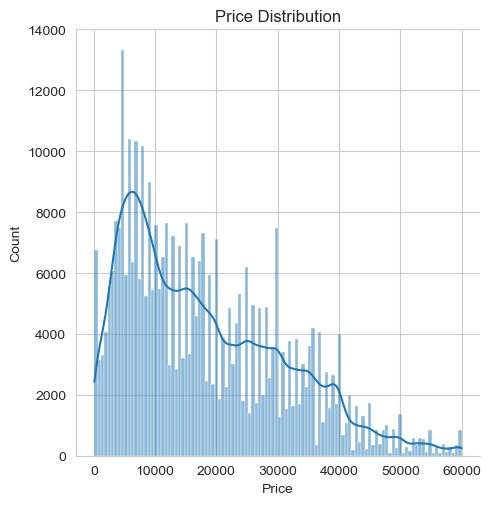

In [369]:
sns.displot(df_cleaned['price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

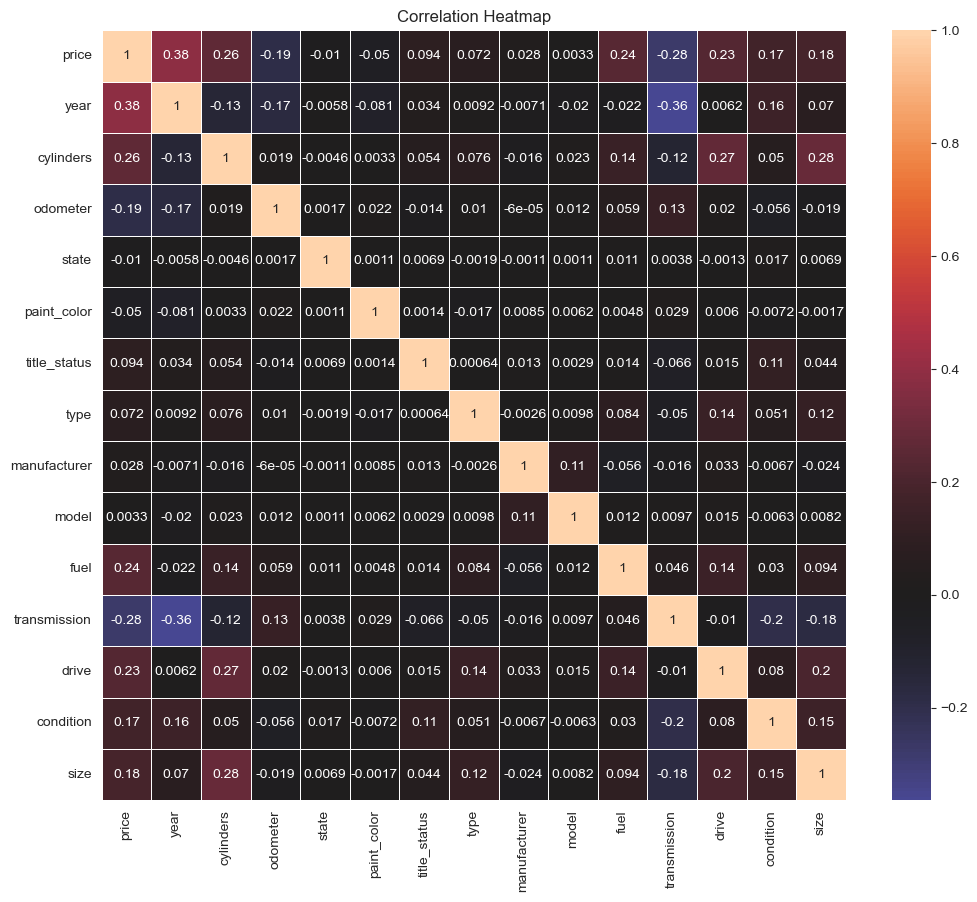

In [370]:
#correlation heatmap all features
sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), center = 0, linewidth = .5, annot = True).set(title='Correlation Heatmap');

We can see some Features that show a good correlation with the price such as year and cylinders. 

In [371]:
# Convert the price in a log value
df_cars = df_cleaned.copy()
df_cars["price"] = np.log(df_cars["price"])
# remove infinite values
df_cars = df_cars[df_cars['price'] != -float('inf')]
calculate_null_percentage(df_cars)

% nulls
price             0.0
year              0.0
cylinders         0.0
odometer          0.0
state             0.0
paint_color       0.0
title_status      0.0
type              0.0
manufacturer      0.0
model             0.0
fuel              0.0
transmission      0.0
drive             0.0
condition         0.0
size              0.0

/Users/oscardominguez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



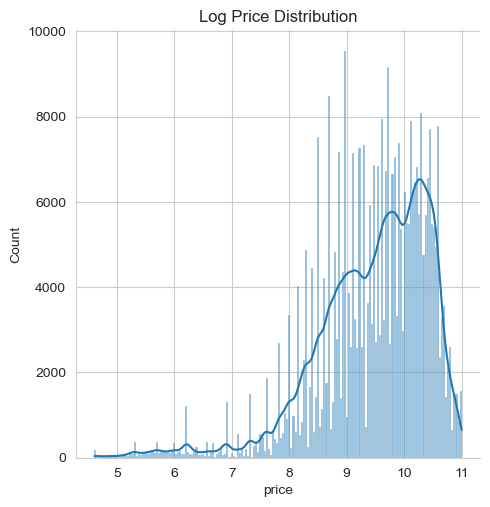

In [372]:
# Log distribution plot with kernel density estimate
sns.displot(df_cars['price'], kde=True);
plt.title("Log Price Distribution")
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [373]:
X = df_cars.drop(columns=["price"], axis=1)
y = df_cars["price"]

In [374]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.3, random_state = 42,)

X_train.head()

year  cylinders  odometer         state    paint_color  \
id                                                                     
7314079654  2015.0          8   68080.0  36193.696880  105240.243671   
7312290839  2009.0          6  121031.0  22956.588589  105240.243671   
7313963675  2016.0          4   86812.0  40434.083631   65153.527177   
7316094875  2018.0          4   18976.0  17773.506065   15721.428394   
7311252434  2020.0          6    3181.0  40434.083631   65153.527177   

            title_status          type  manufacturer         model  \
id                                                                   
7314079654  64397.670565  81901.708563  31131.872718  55063.373698   
7312290839  64397.670565   9213.370102  10321.636778   8283.261939   
7313963675  64397.670565  35617.922287  10777.494781  11632.618114   
7316094875  64397.670565  35617.922287  14797.107276  19251.902116   
7311252434  64397.670565  24999.569360  96058.186391  31515.015625   

                     fuel  transmission         drive  condition  size  
id                                                                      
7314079654  122837.606366  64410.218825  87133.267810        5.0   3.0  
7312290839   58202.046122  64410.218825  15247.331671        4.0   3.0  
7313963675   58202.046122  64410.218825  15247.331671        5.0   2.0  
7316094875   58202.046122  64410.218825  15247.331671        5.0   2.0  
7311252434   58202.046122  30052.870253  87133.267810        5.0   3.0

In [375]:
# Array to store the score of each model
model_scores = []

#### Simple Linear Regression Model

In [416]:
model_1 = LinearRegression(fit_intercept=True)
model_1.fit(X,y)

predicts_train = model_1.predict(X_train)
predicts_test = model_1.predict(X_test)

mse_model_1_train = mean_squared_error(predicts_train, y_train)
mse_model_1_train = mean_squared_error(predicts_test, y_test)

print(f'Train MSE: {mse_model_1_train: .2f}')
print(f'Test MSE: {mse_model_1_train: .2f}')

model_scores.append({"Model":"Simple Linear Regression", "Train MSE": mse_model_1_train, "Test MSE":  mse_model_1_train})

Train MSE:  0.72
Test MSE:  0.72


#### Polinomial Feature, Cross Validation

In [378]:
def cross_validation(X_train, y_train):
    best_degree = ''
    best_mse = np.inf
    best_pipe = None
    
    degrees = range(1,4);
    for degree in degrees:
        pipeline = Pipeline([
            ('p_feature',PolynomialFeatures(degree=degree, include_bias=False)),
            ("scaler", StandardScaler()),
            ('p_linear_regression', LinearRegression(fit_intercept=False))
        ])
        
        pipeline.fit(X_train, y_train)
        predicts = pipeline.predict(X_train)
        mse = mean_squared_error(predicts, y_train)
        if(mse < best_mse):
            best_mse = mse
            best_degree = pipeline.named_steps['p_feature'].degree
            best_pipe = pipeline 
        
    return { 'best_degree': best_degree, 'mse': best_mse, 'best_pipe': best_pipe}

# calculate Cross Validation test and train
cv_mse_train = cross_validation(X_train, y_train)
cv_mse_test = cross_validation(X_test, y_test)

print(cv_mse_train)
print(cv_mse_test)

model_scores.append({"Model":"Cross Validation", "Train MSE": cv_mse_train["mse"], "Test MSE":  cv_mse_test["mse"]})

{'best_degree': 3, 'mse': 0.4833805742571725, 'best_pipe': Pipeline(steps=[('p_feature', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('p_linear_regression', LinearRegression(fit_intercept=False))])}
{'best_degree': 3, 'mse': 0.4775714985494946, 'best_pipe': Pipeline(steps=[('p_feature', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('p_linear_regression', LinearRegression(fit_intercept=False))])}


#### GridSearch and Ridge Model

In [379]:
parameters_to_try = {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
parameters_to_try

{'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

In [380]:
ridge_pipe = Pipeline([
    ("transform", PolynomialFeatures(degree = 3, include_bias = False)),
    ("scale", StandardScaler()),
    ("ridge", Ridge())
])


In [381]:
model_finder = GridSearchCV(
    estimator= ridge_pipe,
    param_grid= parameters_to_try,
    scoring= "neg_mean_squared_error",
    cv=3
)

model_finder.fit(X_train, y_train)

# Best Alpha 1.0
print(f'Best params {model_finder.best_params_}')

print(f'Best score {model_finder.best_score_}')


Best params {'ridge__alpha': 10.0}
Best score -0.5618867532396951


In [382]:
best_stimator_m = model_finder.best_estimator_
predicts_train = best_stimator_m.predict(X_train)
predicts_test = best_stimator_m.predict(X_test)

mse_ridge_train = mean_squared_error(predicts_train, y_train)
mse_ridge_test =mean_squared_error(predicts_test, y_test)


print(f'Ridge Train MSE: {mse_ridge_train: .2f}')
print(f'Ridge Test MSE: {mse_ridge_test: .2f}')


model_scores.append({"Model":"GridSearch and Ridge Model", "Train MSE": mse_ridge_train, "Test MSE":  mse_ridge_test})

Ridge Train MSE:  0.51
Ridge Test MSE:  0.53


#### GridSearch and SequentialFeatureSelector

In [387]:
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [389]:
param_dict = {'selector__n_features_to_select': [7,8,9,10,11]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE Sequential Feature Selector: {selector_train_mse}')
print(f'Test MSE Sequential Feature Selector: {selector_test_mse}')


model_scores.append({"Model":"GridSearch and SequentialFeatureSelector", "Train MSE": selector_train_mse, "Test MSE":  selector_test_mse})

Train MSE Sequential Feature Selector: 0.7219539225170251
Test MSE Sequential Feature Selector: 0.7198336633732323


Coefficient values by column

In [390]:
# extract the best estimator/selector pair from the grid search
best_estimator = selector_grid.best_estimator_
# extract the Sequential Feature selector from the pipeline
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_
# Dataframe with the columns selected by the Sequential Characteristic selector and their respective coefficient
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

year  cylinders      odometer         state   paint_color  \
model  0.03289   0.165486 -6.357136e-07 -8.914969e-08 -3.402662e-07   

       title_status  manufacturer      fuel  transmission     drive  condition  
model      0.000004  3.352731e-07  0.000009     -0.000005  0.000002   0.097911

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [417]:
model_scores_df = pd.DataFrame(model_scores).set_index("Model")
model_scores_df.sort_values(by='Test MSE')

Train MSE  Test MSE
Model                                                        
Cross Validation                           0.483381  0.477571
GridSearch and Ridge Model                 0.507630  0.532366
Simple Linear Regression                   0.719570  0.719570
GridSearch and SequentialFeatureSelector   0.721954  0.719834

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Cross Validation'),
  Text(1, 0, 'GridSearch and Ridge Model'),
  Text(2, 0, 'Simple Linear Regression'),
  Text(3, 0, 'GridSearch and SequentialFeatureSelector')])

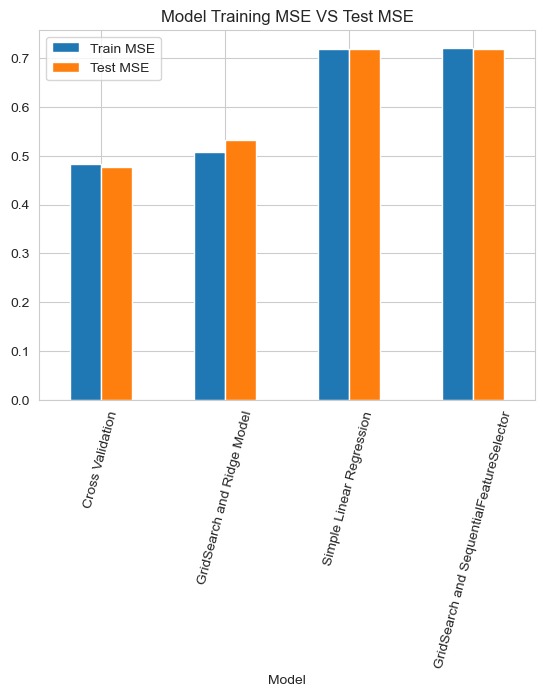

In [418]:
model_to_plot =model_scores_df.sort_values(by='Test MSE')
model_to_plot.plot.bar()
plt.title("Model Training MSE VS Test MSE")
plt.xticks(rotation=75)



As we can see, the model with the lowest MSE is the Cross Validation Model using Polinomial Feature, Standard Scaler and Linear Regression, the best degree was three.

#### Permutation Importance
I am going to evaluate the importance of each feature in the best model

In [393]:
best_model = cross_validation(X_train, y_train)["best_pipe"]
best_model

Pipeline(steps=[('p_feature', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('p_linear_regression', LinearRegression(fit_intercept=False))])

Let's take a look at the relative importance of each component within the model

In [394]:
permutation_linear = permutation_importance(best_model, X_test, y_test, n_repeats = 30, random_state = 42)
print("finished 2")

finished 2


In [395]:
p_importances = []
for i in permutation_linear.importances_mean.argsort()[::-1]:
    if permutation_linear.importances_mean[i] - 2 * permutation_linear.importances_std[i] > 0:
          p_importances.append({"feature": X_train.columns[i], "importances_mean": f"{permutation_linear.importances_mean[i]:.3f}", "importances_std": f" +/- {permutation_linear.importances_std[i]:.3f}"})
        
importance_df = pd.DataFrame(p_importances)
importance_df

feature importances_mean importances_std
0         model          212.612      +/- 37.875
1  manufacturer           86.821       +/- 6.804
2     cylinders           43.754      +/- 16.805
3          year            0.443       +/- 0.060
4     condition            0.042       +/- 0.005

According to the permutation importance method the top 5 important features are "state", "region", manufacturer, model and transmission. For me it is a little strange to see that the state and the region have such importance, let's review the correlation.

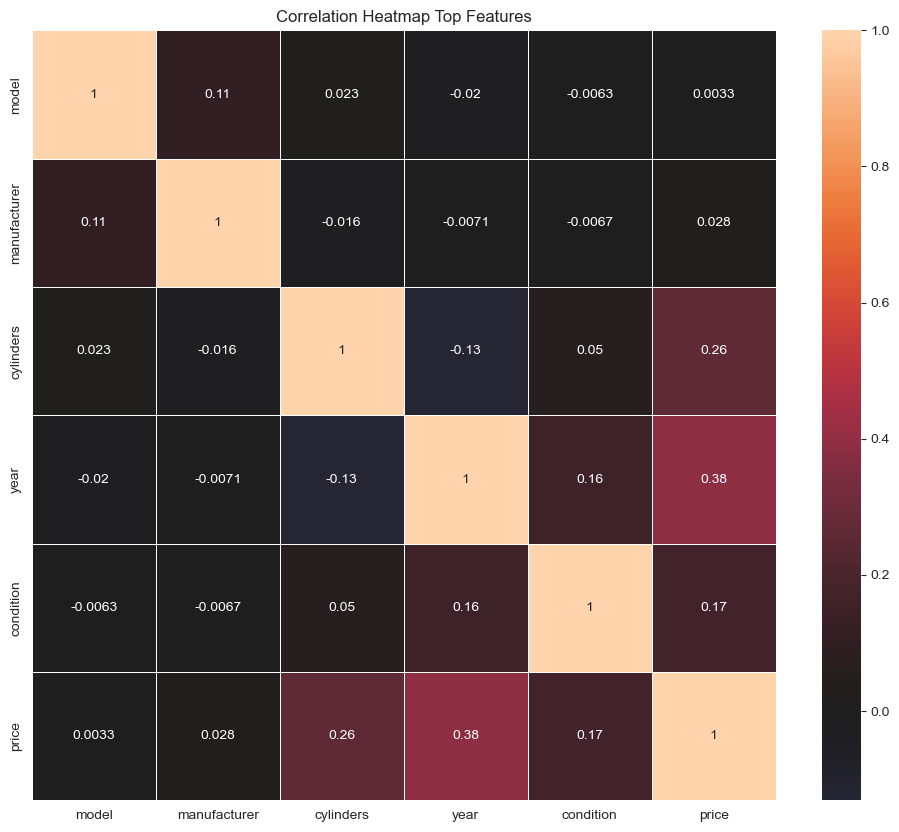

In [425]:
top_five_features = df_cleaned[["model", "manufacturer", "cylinders", "year" , "condition","price"]]

#correlation heatmap  
sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(top_five_features.corr(), center = 0, linewidth = .5, annot = True).set(title='Correlation Heatmap Top Features');

Let's analyze the price for each of the top features. First we start by analyzing what percentages of prices we have, separating them between low, medium and high.

In [431]:
# divides the entire range of "price" values into 4 approximately equal intervals
price_bins = np.linspace(min(top_five_features['price']), max(top_five_features['price']), 4) 

labels = ['Low', 'Medium', 'High']

# Add new column to indicate if the price is Low, Medium or High
top_five_features['price_level'] = pd.cut(df_cleaned['price'], bins=price_bins, labels=labels, right=False)
top_five_features

/var/folders/4g/zs3785952jg0jd5lfdn4s3sm0000gn/T/ipykernel_88638/2831431455.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



model   manufacturer  cylinders    year  condition  price  \
id                                                                             
7316814884  35224.934521   31131.872718          8  2014.0        5.0  33590   
7316814758  20613.607085   23950.644746          8  2010.0        5.0  22590   
7316814989  34391.419552   23950.644746          8  2020.0        5.0  39590   
7316743432  34749.481707  245666.299855          8  2017.0        5.0  30990   
7316356412  18860.384778   36741.604981          6  2013.0        4.0  15000   
...                  ...            ...        ...     ...        ...    ...   
7301591192  41441.210324   19314.095053          6  2019.0        5.0  23590   
7301591187  30767.270620  401447.297113          6  2020.0        5.0  30590   
7301591147  34566.344086   20075.963997          6  2020.0        5.0  34990   
7301591140  24225.749781   19389.550019          6  2018.0        5.0  28990   
7301591129  37295.201810   19137.162331          6  2019.0        5.0  30590   

           price_level  
id                      
7316814884      Medium  
7316814758      Medium  
7316814989      Medium  
7316743432      Medium  
7316356412         Low  
...                ...  
7301591192      Medium  
7301591187      Medium  
7301591147      Medium  
7301591140      Medium  
7301591129      Medium  

[366890 rows x 7 columns]

In [438]:
price_percentage = top_five_features.groupby(["price_level"])["price"].count() / len(top_five_features) * 100
price_percentage = price_percentage.reset_index()

price_level        High
price          5.767941
Name: 2, dtype: object

As we can, more than half of the cars are categorized as low price, while only 5% are considered high price.

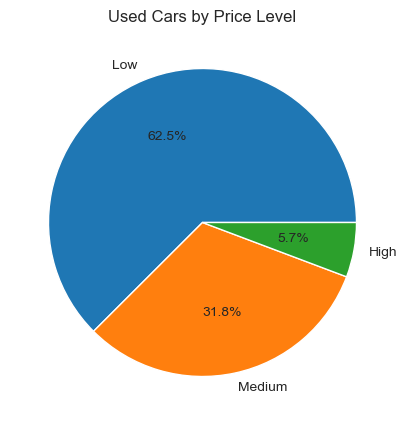

In [400]:
plt.figure(figsize=(10,5))
plt.pie(price_binned['price'], labels = price_binned["price_level"], autopct='%1.1f%%')
plt.title('Used Cars by Price Level')
plt.show()

In [443]:
highprices = top_five_features[top_five_features["price_level"] == "High" ]


model   manufacturer  cylinders    year  condition  price  \
id                                                                             
7308730136  38107.629622   36741.604981          8  2019.0        5.0  40590   
7308255063  26696.635271   96058.186391          6  2019.0        5.0  43990   
7304184221  35652.282609   96058.186391          6  2017.0        5.0  40990   
7302537532  48771.859636   26951.621564          6  2020.0        5.0  52990   
7316691442   9039.294865   31131.872718          6  2019.0        5.0  58977   
...                  ...            ...        ...     ...        ...    ...   
7302191669  50131.882650   36741.604981          6  2017.0        5.0  54999   
7302118268  40752.557433   36741.604981          6  2015.0        5.0  41999   
7301954392  38485.896802  245666.299855          6  2019.0        5.0  41990   
7301953587  53904.334701   20075.963997          6  2020.0        5.0  51990   
7301952155  53904.334701   20075.963997          6  2020.0        5.0  48590   

           price_level  
id                      
7308730136        High  
7308255063        High  
7304184221        High  
7302537532        High  
7316691442        High  
...                ...  
7302191669        High  
7302118268        High  
7301954392        High  
7301953587        High  
7301952155        High  

[21162 rows x 7 columns]

In [447]:
# get the high prices in the original dataset
highprices_df = data[data.id.isin(highprices.index)]
highprices_df

id  price    year manufacturer                        model  \
105     7308730136  40590  2019.0         ford  f250 super duty regular cab   
107     7308255063  43990  2019.0         jeep    wrangler unlimited sahara   
143     7304184221  40990  2017.0         jeep   wrangler unlimited rubicon   
158     7302537532  52990  2020.0       jaguar     e-pace p300 r-dynamic se   
204     7316691442  58977  2019.0          gmc                  sierra 3500   
...            ...    ...     ...          ...                          ...   
426839  7302191669  54999  2017.0         ford                         2017   
426846  7302118268  41999  2015.0         ford                         2015   
426857  7301954392  41990  2019.0       toyota        4runner limited sport   
426858  7301953587  51990  2020.0     cadillac           xt6 premium luxury   
426859  7301952155  48590  2020.0     cadillac           xt6 premium luxury   

       condition  cylinders   fuel  odometer title_status transmission drive  \
105         good          8  other    9313.0        clean        other   4wd   
107         good          6    gas    4362.0        clean        other   4wd   
143         good          6  other   30092.0        clean        other   4wd   
158         good          6    gas      79.0        clean        other   4wd   
204         good          6    gas   66368.0        clean    automatic   4wd   
...          ...        ...    ...       ...          ...          ...   ...   
426839      good          6    gas  119000.0        clean    automatic   4wd   
426846      good          6    gas  126000.0        clean    automatic   4wd   
426857      good          6    gas   36630.0        clean        other   4wd   
426858      good          6    gas    6814.0        clean        other   fwd   
426859      good          6    gas    7701.0        clean        other   fwd   

             size    type paint_color state  
105     full-size  pickup       white    al  
107     full-size     SUV       black    al  
143     full-size   other       black    al  
158     full-size   other       white    al  
204     full-size   sedan       white    al  
...           ...     ...         ...   ...  
426839  full-size   sedan       white    wy  
426846  full-size   sedan       white    wy  
426857  full-size     SUV       white    wy  
426858  full-size   other       black    wy  
426859  full-size   other       black    wy  

[21162 rows x 16 columns]

/var/folders/4g/zs3785952jg0jd5lfdn4s3sm0000gn/T/ipykernel_88638/1350177125.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



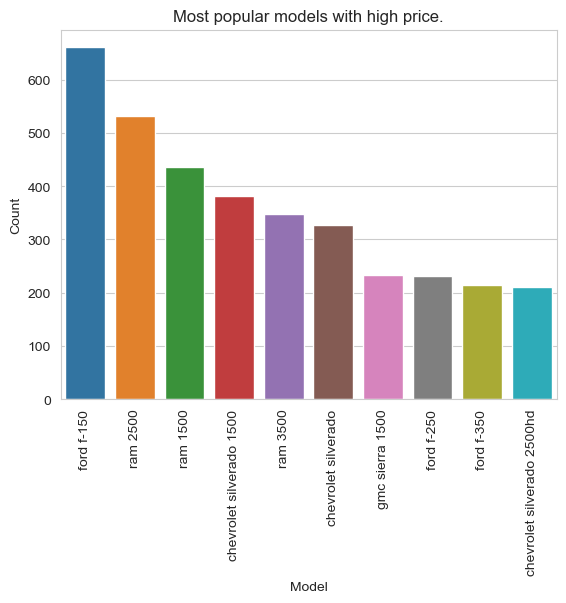

In [455]:
highprices_df["manufacturer-model"] = highprices_df["manufacturer"] + " " + highprices_df["model"]
count_models = highprices_df["manufacturer-model"].value_counts().head(10)

sns.barplot(x=count_models.index, y=count_models.values)

plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Most popular models with high price.')
plt.show()

In [457]:
#  The top 3 of manufacturer that have cars with high prices are ford, chevrolet and ram.
highprices_df["manufacturer"].value_counts()

manufacturer
ford             6130
chevrolet        3254
ram              2921
gmc              1595
toyota           1148
jeep              876
bmw               772
mercedes-benz     761
audi              591
cadillac          375
dodge             297
lexus             282
acura             261
jaguar            254
rover             250
lincoln           237
buick             209
porsche           164
nissan            154
tesla             137
volvo             126
infiniti          117
kia                75
honda              62
mini               25
subaru             22
volkswagen         21
pontiac            17
hyundai            10
alfa-romeo          5
aston-martin        4
chrysler            4
land rover          2
ferrari             2
mazda               1
mercury             1
Name: count, dtype: int64

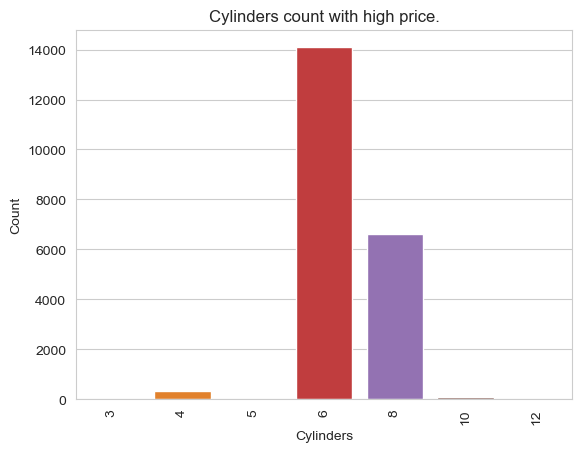

In [461]:
count_models = highprices_df["cylinders"].value_counts().head(10)

sns.barplot(x=count_models.index, y=count_models.values)

plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Cylinders related with high price.')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

After analyzing the data set you sent me, I came to the following conclusions:

#### The three most important features are:
The following characteristics have a high relationship with the price of the vehicles, the idea is that each person can refine their repertoire of vehicles according to these characteristics if they wish with the aim of obtaining better income.

 * Model: It is the characteristic that seems most important to us in relation to the price of a car, in this way I will show you the top 10 of the most popular used cars with a high price:
* Manufacturer: The top 3 manufacturers that have cars with high prices are Ford, Chevrolet and Ram.
* Cylinders: 6 and 8 cylinder cars have almost the entire percentage of the relationship with high priced vehicles